In [1]:
import numpy as np
import matplotlib.pyplot as plt

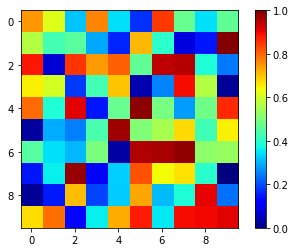

In [2]:
# 10x10のダミーデータ作成
mat = np.random.rand(10,10)

# ヒートマップ表示
plt.figure()
plt.imshow(mat,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.show()

In [4]:
dx=0.04
dt=0.02
N=int(1/dx)

Dp=2*10**-4
Dq=0.01



def f(a,b):
    return 0.6*a-1.0*b-a*a*a

def g(a,b):
    return 1.5*a-2.0*b

def laplacian(v):
    res=np.roll(v,1,axis=0)\
       +np.roll(v,-1,axis=0)\
       +np.roll(v,1,axis=1)\
       +np.roll(v,-1,axis=1)\
       -4*v
    
    return res


In [19]:
%%time
p=np.random.rand(N,N,1)*0.01
q=np.random.rand(N,N,1)*0.01

tmax=2000
for i in range(tmax):
    next_p=p[:,:,-1]+dt*(f(p[:,:,-1],q[:,:,-1])+Dp*laplacian(p[:,:,-1])/(dx*dx))
    next_q=q[:,:,-1]+dt*(g(p[:,:,-1],q[:,:,-1])+Dq*laplacian(q[:,:,-1])/(dx*dx))
    p=np.dstack([p,next_p])
    q=np.dstack([q,next_q])

CPU times: user 2.47 s, sys: 2.89 s, total: 5.36 s
Wall time: 5.39 s


<IPython.core.display.Javascript object>


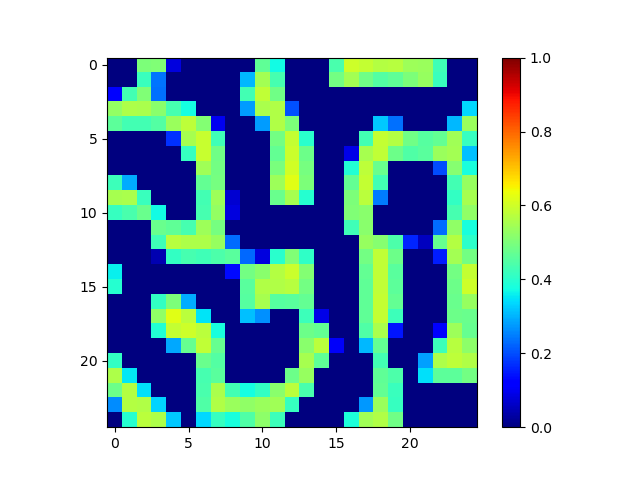

In [25]:
# ヒートマップ表示
plt.figure()
plt.imshow(p[:,:,-1],interpolation='nearest',vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


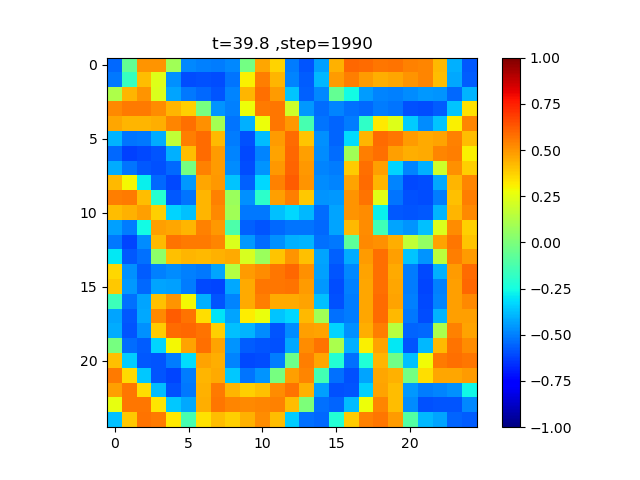

In [53]:
%matplotlib nbagg
from matplotlib.animation import PillowWriter,FuncAnimation


#plt.colorbar()
def animate(i):
    clock=dt*i*10
    step=i*10
    plt.cla()
    plt.imshow(p[:,:,i*10],interpolation='nearest',vmin=-1,vmax=1,cmap='jet')
    
    plt.title("t={0:.1f} ,step={1:3d}".format(clock,step))

fig=plt.figure()
plt.colorbar(plt.imshow(p[:,:,-1],interpolation='nearest',vmin=-1
                        ,vmax=1,cmap='jet'))

anim=FuncAnimation(fig,animate,repeat=False,frames=200,interval=10)
anim.save("2D_Turing_Pattern.gif", writer='pillow',fps=10)
#plt.show()

In [37]:
p.shape

(25, 25, 2001)